# Simulated Annealing for Travelling Salesman Problem

In [6]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import random
# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format
# Plot inline in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()
# Width = 16, Height = 6
DIMS=(16, 6)
import os

# multiprocessing libraries
from operator import itemgetter


# multiprocessing libraries
from operator import itemgetter
from itertools import permutations
from multiprocessing import Pool, Manager
from tqdm import tqdm
import cProfile
import re    
import functools
import json


## Optimizing Data Structure for City Storage

In [7]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
'''
At some n, generating the list of solutions is going to take such a long time that it will be more worth to use the doubly
linked list data structure to optimize the city generation
'''


class Node:

    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None


# Create the doubly linked list

class doubly_linked_list:

    def __init__(self):
        self.head = None

    def push(self, new_node):
        '''
        push takes in a value and adds it to the end of the doubly linked list
        '''

        new = Node(new_node)
        new.next = self.head
        if self.head is not None:
            self.head.prev = new
        self.head = new

    def insert(self, prev_node, new_node):
        '''
        takes in value of the previous node
        '''

        if prev_node is None:
            return
        new = Node(new_node)
        new.next = prev_node.next
        prev_node.next = new
        new.prev = prev_node
        if new.next is not None:
            new.next.prev = new

    def delete(self, node):
        if self.head.data == node:
            self.head = self.head.next
            self.head.prev = None
            return

        n = self.head
        while n.next is not None:
            if n.data == node:
                break
            n = n.next
        if n.next is not None:
            n.prev.next = n.next
            n.next.prev = n.prev
        else:
            if n.data == node:
                n.prev.next = None
            else:
                print('Element not found')

    # Define the method to print the linked list

    def listprint(self, node):
        while node is not None:
            print(node.data)
            last = node
            node = node.next

    def get_tour(self, node):
        ordered_tour = list()
        while node is not None:
            ordered_tour.append(node.data)
            last = node
            node = node.next
        return ordered_tour[::-1]

    def get_node_index(self, node):
        current = self.head
        index = 1
        while current != None:
            if current.data == node:
                return index
            current = current.next
            index += 1
        return -1

    def get_next_node(self, node):
        next_node = None
        current = self.head

        # somehow need to check the last node

        while current.next.data != node:
            current = current.next

        next_node = current.data
        print(next_node)
        return next_node


# [dllist.push(i) for i in cities.keys()]

# dllist = doubly_linked_list()
# dllist.push(12)
# dllist.push(8)
# dllist.push(62)
# dllist.push(50)
## dllist.insert(dllist.head.next, 13)
##dllist.listprint(dllist.head)
# dllist.get_next_node(62)


## Generate Cities


In [8]:
class GenCities:

    def __init__(self, no_cities=10):
        self.start_city = 0.0
        self.cities = dict()
        self.n = no_cities
        self.i1 = np.arange(0, 0 + (self.n**0.5), 0.01)
        self.i2 = np.arange(0, 0 + (self.n**0.5), 0.01)
        #self.i1 = np.arange(0, 0 + self.n, 0.01)
        #self.i2 = np.arange(0, 0 + self.n, 0.01)
        self.distance = lambda x, y: np.sqrt((x[0] - y[0]) ** 2 + (x[1]
				- y[1]) ** 2)
        self.dllist = doubly_linked_list()

        self.start_city = random.randint(0, self.n)
        print(self.start_city)
        self.dllist.push(self.start_city)
        self.table_distances = dict()

    def random_start(self):
        """ 
        input: none

        Randomly choose a point within the boundary

        output: (x1, x2)
        """

        (x, y) = [random.uniform(self.i1[0], self.i1[-1]),
                  random.uniform(self.i2[0], self.i2[-1])]

        return [x, y]

    def random_neighbour(self):
        """ 
        input: x (a list) containing cities visited
        Choose a random point to move to, and checks whether that point has already been traversed
        output: (newx, newy)
        """

            # normalized

        unvisited = [i for i in list(self.cities.keys())
                     if self.cities[i] == 0]
        if self.cities[self.start_city][1] < 2:
            unvisited.append(self.start_city)

            # choose a rnadom city to visit (in key form)

        if len(unvisited) > 1:
            choose_city = unvisited[random.randint(0, len(unvisited))]

                # rechoose new city if the chosen city is the start city

        if unvisited == start_city:
            choose_city = unvisited[random.randint(0, len(unvisited))]
        else:
            choose_city = start_city

        self.cities[choose_city][1] += 1
        return self.cities[choose_city]

    def generate_cities(self):
        '''
        reinitializes at a random point
        '''

        city = self.start_city
        state = self.random_start()
        self.cities[city] = [state, 0]

        for i in range(self.n):  # not to include the start city

                    # this ensures we don't generate cities that have already been generated

            while len(list(self.cities.keys())) < self.n:
                if city in list(self.cities.keys()):
                    city = random.randint(1, self.n)
                else:
                    state = self.random_start()

                                    # not calculating the cost

                    self.cities[city] = [state, 0]
                    self.dllist.push(city)
        return self.cities

    def print_city_map(self):
        (x1m, x2m) = np.meshgrid(self.i1, self.i2)
        fm = np.zeros(x1m.shape)
        for i in range(x1m.shape[0]):
            for j in range(x1m.shape[1]):
                fm[i][j] = 0.2 + x1m[i][j] ** 2 + x2m[i][j] ** 2 - 0.1 \
                    * math.cos(6.0 * 3.1415 * x1m[i][j]) - 0.1 \
                    * math.cos(6.0 * 3.1415 * x2m[i][j])

        plt.figure()

            # CS = plt.contour(x1m, x2m, fm)#,lines)
            # plt.clabel(CS, inline=1, fontsize=10)

        plt.title('TSP Map')
        plt.xlabel('x')
        plt.ylabel('y')

        lists = sorted(self.cities.values())  # sorted by key, return a list of tuples
        (x, y) = zip(*lists)  # unpack a list of pairs into two tuples
        plt.scatter(*zip(*x))
        plt.show()

    def generate_initial_tour(self):

        city_copy = self.cities.copy()  # create a local copy of city to modify it

            # append the start city to the start and end

        unvisited = [k for (k, v) in self.cities.items()
                     if k != self.start_city]
        random.shuffle(unvisited)
        tour = [self.start_city] + unvisited + [self.start_city] 
        return tour
      
    def precomp_distances(self):
        '''
        input: none
        function that comes up with a table of distances of each city to the next 
        output: none
        '''

        # distances is an ordered list containing visited cities
        "Cities Precomputed and stored in Matrix"
        for (k, v) in self.cities.items():
            self.table_distances[k] = dict()
            tour_distances = ((i, self.distance(self.cities[i][0],
                               self.cities[k][0])) for (i, j) in
                self.cities.items() if i != k)
            self.table_distances[k] = dict((x, y) for (x, y) in
                    tour_distances)
            

def spawn_cities(no_cities, **args):
    create_city = GenCities(no_cities)
    create_city.generate_cities()
    tour = create_city.generate_initial_tour()
    cities = create_city.cities
    start_city = create_city.start_city
    create_city.precomp_distances()

    return create_city

city = 10
Ncity = spawn_cities(no_cities=city)

4


In [ ]:
pd.DataFrame(Ncity.init_tour).rename(columns={0:"tour_order"}).to_csv("initial_tour_30.csv")
cities_dict = {"city":list(), "x":list(), "y":list()}
for k,v in Ncity.cities.items():
    cities_dict['city'].append(k)
    cities_dict['x'].append(Ncity.cities[k][0][0])
    cities_dict['y'].append(Ncity.cities[k][0][1])
cities_dataframe = pd.DataFrame(cities_dict)
cities_dataframe.to_csv("city_coordinates_100.csv")

## Annealing Code

If the temperature T is set to a very small constant value then the simulated annealing becomes like stochastic hill climbing. If T is set to a very large constant value, then simulated annealing becomes like random search

In [40]:
class SAAnneal:

    '''
    Pass the max steps you want to take to the annealer function
    '''

    def __init__(

        self,
        maxsteps=500,
        multiplier=1,
        control_t=1,
        acceptrate=0.5,
        lams=0,
        swaps=round((Ncity.n)**0.5),
        explore=30,
        error_thres=10e-3, 
        correct=0.0
        #accs = [500, 1, 1, 0.5, 0, round((Ncity.n)**0.5), 30]
        ):
        '''
        inputs: total number of steps to try, geometric multiplier for annealing schedule
        
        Initialize parameters
        
        output: none
        '''
        self.correct_answer, self.error_threshold, self.cumulative_correct = correct, error_thres, 0.0
        self.cities, self.start_city, self.init_tour = Ncity.cities, Ncity.start_city, Ncity.generate_initial_tour()
        self.trig_lams = lams
        
        self.Tmax, self.exploration_space, self.swaps = maxsteps, explore, swaps
        
        self.threshold, self.control, self.acceptrate = multiplier, control_t, acceptrate
        self.distance = lambda x, y: np.sqrt((x[0] - y[0]) ** 2 + (x[1]
                - y[1]) ** 2)
        self.table_distances = Ncity.table_distances

        
    def f(self, tour):
        '''
        input: tour (list)
        
        Function that evaluates the cost of a given x1, x2 (euclidean distance)
        
        output: single cost
        '''
        distances = [self.table_distances[tour[i]][tour[i + 1]] for i in range(len(tour) - 1)]

        total_distance = sum(distances)
        average_tour_len = total_distance / len(tour)
        return (total_distance, average_tour_len)

    def acceptance_probability(
        self,
        cost,
        new_cost,
        temperature,
        ):
        '''
        inputs: old cost, new cost, current temperature
        
        calculate probability of acceptance and return it using the metropolis algorithm
        
        output: probability (0 to 1)
        '''

        return np.exp(-(new_cost - cost) / temperature)

    def swap_random(self, tour):
        '''
        randomly swaps 2 tours
        '''

        tour = tour[1:][:-1]
        idx = range(Ncity.n - 1)
        for i in range(self.swaps):
            (i1, i2) = random.sample(idx, 2)
            (tour[i1], tour[i2]) = (tour[i2], tour[i1])

        tour = [self.start_city] + tour + [self.start_city]
        (cost, average_tour_len) = self.f(tour)
        return (tour, cost, average_tour_len)

    def check_correct(self, energy):
        self.cumulative_correct += np.sum([1 if (i-self.correct_answer)<=self.error_threshold or i<self.correct_answer else 0 for i in energy])
    
    def anneal(self):
        '''
        inputs: none
        
        function performs annealing and calls random start to kickstart the annealing process. iteratively
        calculates the new cost.
        
        output: final cost, final state (list of x1 and x2), all costs (list of costs at every timestep)
        
        '''

        # params related to returning the cost and deviation from the optimal objective function
        # deviation = list()

        # params related to Lam's Annealing Schedule

        best_tour = list()
        current_tour = list()
        best_tour_total = list()
        current_tour_total = list()
        tours = list()
        T_list = list()

        acceptrate = self.acceptrate
        LamRate = 0
        tours.append(self.init_tour)

        
        (costs, average_tour_length) = self.f(self.init_tour)
        states = self.init_tour
        best_tour_total.append(costs)
        best_tour.append(average_tour_length)

        for temp_step in range(self.Tmax):

            # for each temperature step
            fraction = temp_step / float(self.Tmax)

            if self.control == 0 & temp_step > 0:
                T = self.threshold * (1 - fraction)
            else:
                T = 1 - fraction

            T_list.append(T)

            # exploration space

            (new_tour, new_cost, new_average_tour_length) = self.swap_random(states)
                
            if new_tour not in tours:
                tours.append(new_tour)

            current_tour_total.append(new_cost)
            current_tour.append(new_average_tour_length)

            if (new_cost < costs) or (self.acceptance_probability(costs,
            new_cost, T) >= random.uniform(0, 1)):
                (states, costs, average_tour_length) = (new_tour, new_cost, new_average_tour_length)

                if self.trig_lams == 1:
                    acceptrate = 1 / 500 * (499 * acceptrate + 1)
            else:

                if self.trig_lams == 1:

                    acceptrate = 1 / 500 * (499 * acceptrate)

                # check conditions

                if fraction < 0.15:
                    LamRate = 0.44 + 0.56 * 560 ** (-temp_step
                    / (self.Tmax * 0.15))
                elif fraction < 0.65:
                    LamRate = 0.44
                else:
                    LamRate = 0.44 * 440 ** ((-temp_step / self.Tmax
                    - 0.65) / 0.35)

                if LamRate < acceptrate:
                    T *= 0.99
                else:
                    T *= 1 / 0.999

            if best_tour_total[-1] > costs:
                best_tour_total.append(costs)
                best_tour.append(average_tour_length)
            else:
                best_tour_total.append(best_tour_total[-1])
                best_tour.append(best_tour[-1])
            
        self.check_correct(current_tour)
            
        return (best_tour[1:], current_tour, best_tour_total[1:], current_tour_total, T_list, tours, self.cumulative_correct)

In [41]:
tries_temp = {"run":list(), "temp":list(), "best_tour_avg":list(), "best_tour_total":list(), "current_tour_avg":list(), "current_tour_total":list()}

a = SAAnneal(5000, 1, 1, lams=1, correct=lowest)
best_tour, current_tour, best_tour_total, current_tour_total, temp, tours, cumulative = a.anneal()
cost_keys = len(list(best_tour))
for k in range(cost_keys):
    tries_temp['run'].append(k)
    tries_temp['temp'].append(temp[k])
    tries_temp['best_tour_avg'].append(best_tour[k])
    tries_temp['best_tour_total'].append(best_tour_total[k])
    tries_temp['current_tour_avg'].append(current_tour[k])
    tries_temp['current_tour_total'].append(current_tour_total[k])
      #tries_temp['deviations'].append(deviations[k][-1][-1])

temp_df = pd.DataFrame.from_dict(tries_temp)
temp_mean = temp_df.groupby(['temp']).mean().reset_index()
temp_mean[temp_mean['current_tour_avg']==temp_mean['current_tour_avg'].min()]
temp_mean.head(10)
#temp_mean = temp_df.groupby(['temp']).mean().reset_index()
#temp_mean.to_csv("tsp_anneal.csv")



,temp,run,best_tour_avg,best_tour_total,current_tour_avg,current_tour_total
0,0.0,4999,0.8,8.7,1.2,13.1
1,0.0,4998,0.8,8.7,1.4,15.2
2,0.0,4997,0.8,8.7,1.5,16.1
3,0.0,4996,0.8,8.7,1.2,13.2
4,0.0,4995,0.8,8.7,1.3,14.3
5,0.0,4994,0.8,8.7,1.6,18.1
6,0.0,4993,0.8,8.7,1.0,11.2
7,0.0,4992,0.8,8.7,1.1,12.2
8,0.0,4991,0.8,8.7,1.0,11.5
9,0.0,4990,0.8,8.7,1.2,12.8


In [42]:
cumulative

245.0

In [ ]:
fig, ax1 = plt.subplots(1, 1)
plt.xlabel("Temperature")
plt.ylabel("Tour Length", fontsize=12)
# colormap = plt.cm.gist_ncar
# plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1.01, 11))))
plt.title("Total Tour Length v. Temperature")
plt.xlim(1.0, -0.5)

# for i in range(0, 15):
#     markersx = 60 - (i*4)
#     plt.plot(temp_mean['temp'].tolist()[-(i+1)], temp_mean['cost'].tolist()[-(i+1)], marker='o', markersize=markersx)
plt.plot(temp_mean['temp'].tolist(), temp_mean['best_tour_avg'].tolist(), label="best_cost")
plt.plot(temp_mean['temp'].tolist(), temp_mean['current_tour_avg'].tolist(), label="current_cost")
plt.legend(fontsize=12)
#plt.plot(temp_df['temp'].tolist(), temp_df['avg_tour_len'].tolist())
plt.savefig('anneal_totallen.png')

# Greedy Algorithm

In [18]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


class GreedyTSP:

    def __init__(self):
        self.cities = Qcity.cities
        self.start_city = Qcity.start_city
        print(self.start_city)
        self.interval = list()

        self.visited_cities = list()

        self.greedy_tour = list()
        self.distance = lambda x, y: np.sqrt((x[0] - y[0]) ** 2 + (x[1]
                - y[1]) ** 2)
        self.table_distances = Qcity.table_distances


    def f(self, point):
        '''
        input: a point

        Function that finds the minimum distance based on the table with distances to each point

        returns: the distance to the next node
        '''

        next_node = min(self.table_distances[point],
                        key=self.table_distances[point].get)
        distance = self.table_distances[point][next_node]
        return (next_node, distance)

    def perform_greedy(self):
        '''
        function that calls f to perform the greedy function and calculate the distance
        '''

        total_distance = 0.0
        city_keys = len(self.cities.keys())
        next_node = (self.start_city, 0)
        self.visited_cities.append(self.start_city)
        while len(self.visited_cities) <= city_keys:
            # check whether we are at the last node

            if len(self.visited_cities) <= city_keys-1:
                next_node = self.f(next_node[0])

                while next_node[0] == self.start_city:
                    next_node = self.f(next_node[0])
                    
                self.visited_cities.append(next_node[0])

                for (k, v) in self.table_distances.items():
                    if k != next_node[0]:
                        del self.table_distances[k][next_node[0]]
                total_distance += next_node[1]
                
            else:

            # else we are at the last node and return back to starting point
                total_distance += \
                    self.table_distances[next_node[0]][self.start_city]
                
                self.visited_cities.append(self.start_city)

            avg = total_distance / len(self.visited_cities)

        average_distance = total_distance / city_keys
        return (total_distance, average_distance)

    def greedy_this(self):
        '''
        call this function to run the entire annealing algortihm
        '''
        (total_distance, average_distance) = self.perform_greedy()
        return (total_distance, average_distance)
    

# Brute Force Algorithm

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


class BruteTSP:

    def __init__(self):
        self.cities = Ncity.cities
        self.start_city = Ncity.start_city
        self.init_tour = Ncity.init_tour

        self.interval = list()

        self.visited_cities = list()

        self.greedy_tour = list()
        self.distance = lambda x, y: np.sqrt((x[0] - y[0]) ** 2 + (x[1]
                - y[1]) ** 2)
        self.table_distances = Ncity.table_distances
        self.shortest_distance = list()  # tour: distance
        self.all_distance = list()

    def f(self, tour):
        '''
        input: tour (list)

        Function that evaluates the cost of every single remaining node

        output: distance
        '''

        distances = [self.table_distances[tour[i]][tour[i + 1]]
                     for i in range(len(tour) - 1)]

#         for i in range(len(tour) - 1):
#             total_distance += self.table_distances[tour[i]][tour[i+1]]

        total_distance = sum(distances)
        average_tour_len = total_distance / len(tour)
        return (total_distance, average_tour_len)

    def heap_perm(self, A):
        ''' instantiate the heap algorithm '''

        n = len(A)
        Alist = [el for el in A]
        for hp in self._heap_perm_(n, Alist):
            yield hp

    def _heap_perm_(self, n, A):
        ''' implement the heap algorithm for generating permutations '''

        if n == 1:
            yield A
        else:
            for i in range(n - 1):
                for hp in self._heap_perm_(n - 1, A):
                    yield hp
                j = (0 if n % 2 == 1 else i)
                (A[j], A[n - 1]) = (A[n - 1], A[j])
            for hp in self._heap_perm_(n - 1, A):
                yield hp

    def brute_this(self):
        '''
        generates a tour and adds the shortest distance. instead of generating many permutations, 
        how do we know that we have explored all permutations?? 
        '''


        minimum_distance = (self.init_tour, self.f(self.init_tour))  # initial tour, total, average length

        # perms = list(permutations(self.init_tour[1:][:-1]))

        for item in self.heap_perm(self.init_tour[:1][:-1]):
            self.shortest_distance.append(minimum_distance[1])

            new_tour = [self.start_city] + item + [self.start_city]
            cost = (item, self.f(new_tour))

            self.all_distance.append(cost)

            if minimum_distance[1] > cost:  # if new tour cost is lesser than the cost of the old tour
                minium_distance = (new_tour, cost)  # gen permutation

#         for i in perms:
#             tours.append([self.start_city] + list(i) + [self.start_city])
        # tours = [[self.start_city] + i + [self.start_city] for i in perms]
#        distances = [self.f(i) for i in tours]
#        total_distance, average_distance = zip(*distances)

#        lowest = min(enumerate(average_distance), key=itemgetter(1))[0]

        return minimum_distance


In [ ]:
a = BruteTSP()
dist = a.brute_this()
print(dist)

In [ ]:
tries_brute = {"run":list(), "avg_tour_len":list(), "cost":list()}#, "deviations":list()}

for i in range(100):
  print(i)
  a = BruteTSP()
  total_distance, average_distance = a.brute_this()
  tries_greedy['run'].append(i)
  tries_greedy['avg_tour_len'].append(average_distance)
  tries_greedy['cost'].append(total_distance)
#   print("The total distance from Greedy TSP is: {}".format(total_distance))
#   print("The average distance from Greedy TSP is: {}".format(average_distance))

brute_df = pd.DataFrame.from_dict(tries_temp)
brute_mean = brute_df.groupby(['run','temp']).mean().reset_index()
brute_mean.to_csv("visited_cities_greedy_100.csv")

# Annealing Algorithm

In [ ]:
tries_temp = {"run":list(), "temp":list(), "best_tour":list(), "current_tour":list()}#, "deviations":list()}

for i in range(100):
    a = TSP_Anneal(5000, 1, 1, swaps=1)
    best_tour, current_tour, temp = a.anneal()
    cost_keys = len(list(avg_len))
    for k in range(cost_keys):
        tries_temp['run'].append(i)
        tries_temp['temp'].append(temp[k])
        tries_temp['best_tour'].append(best_tour[k])
        tries_temp['current_tour'].append(current_tour[k])
        #tries_temp['deviations'].append(deviations[k][-1][-1])

temp_df = pd.DataFrame.from_dict(tries_temp)
temp_mean = temp_df.groupby(['temp']).mean().reset_index()
temp_mean.to_csv("tsp_anneal.csv")



In [ ]:
temp_mean[temp_mean['best_tour']==temp_mean['best_tour'].min()]
temp_mean.sample(20)


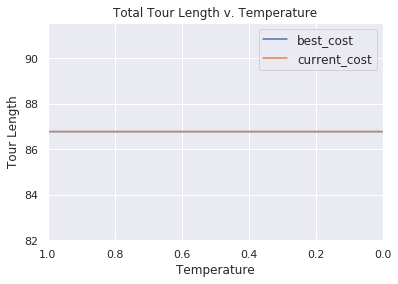

In [ ]:
fig, ax1 = plt.subplots(1, 1)
plt.xlabel("Temperature")
plt.ylabel("Tour Length", fontsize=12)
# colormap = plt.cm.gist_ncar
# plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1.01, 11))))
plt.title("Total Tour Length v. Temperature")
plt.xlim(1.0, 0)

# for i in range(0, 15):
#     markersx = 60 - (i*4)
#     plt.plot(temp_mean['temp'].tolist()[-(i+1)], temp_mean['cost'].tolist()[-(i+1)], marker='o', markersize=markersx)
plt.plot(temp_mean['temp'].tolist(), temp_mean['best_tour'].tolist(), label="best_cost")
plt.plot(temp_mean['temp'].tolist(), temp_mean['current_tour'].tolist(), label="current_cost")
plt.legend(fontsize=12)
#plt.plot(temp_df['temp'].tolist(), temp_df['avg_tour_len'].tolist())
plt.savefig('anneal_totallen.png')

In [ ]:
fig, ax1 = plt.subplots(1, 1)
plt.xlabel("Temperature")
plt.ylabel("Average Tour Length", fontsize=12)
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1.01, 11))))
plt.title("Average Tour Length v. Temperature")
plt.xlim(1.0,0)

# for i in range(0, 15):
#     markersx = 60 - (i*4)
#     plt.plot(temp_mean['temp'].tolist()[-(i+1)], temp_mean['avg_tour_len'].tolist()[-(i+1)], marker='o', markersize=markersx)
plt.plot(temp_mean1['temp'].tolist()[0], temp_mean1['avg_tour_len'].tolist()[0], 'oy', markersize=22)
#plt.plot(temp_df['temp'].tolist(), temp_df['cost'].tolist())
plt.plot(temp_mean1['temp'].tolist(), temp_mean1['avg_tour_len'].tolist())
plt.savefig("anneal_avglen.png")

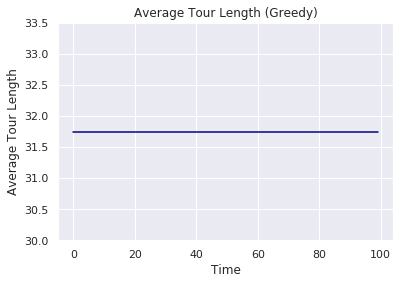

In [58]:
fig, ax1 = plt.subplots(1, 1)
plt.xlabel("Time")
plt.ylabel("Average Tour Length", fontsize=12)
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1.01, 11))))
plt.title("Average Tour Length (Greedy)")
#plt.xlim(1.0, 0)

# for i in range(0, 15):
#     markersx = 60 - (i*4)
#     plt.plot(greedy_mean['temp'].tolist()[-(i+1)], greedy_mean['avg_tour_len'].tolist()[-(i+1)], marker='o', markersize=markersx)
# plt.plot(greedy_mean['temp'].tolist()[0], greedy_mean['avg_tour_len'].tolist()[0], 'oy', markersize=22)
#plt.plot(temp_df['temp'].tolist(), temp_df['cost'].tolist())
plt.plot(greedy_mean['total_len'].tolist())
plt.savefig("greedy_avglen.png")

# Try: 1, 2, 3 swaps. for 20 / 30 cities

https://ilovesymposia.com/2015/12/10/the-cost-of-a-python-function-call/
https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/
http://numba.pydata.org/numba-doc/0.15.1/tutorial_firststeps.html#compiling-a-function-with-numba-jit-using-an-explicit-function-signature


In [ ]:
def run_function(a):
    cProfile.run('a.anneal()')
    best_tour, current_tour, best_tour_total, current_tour_total, temp, tours = a.anneal()
    return best_tour, current_tour, best_tour_total, current_tour_total, temp, tours


In [ ]:
def get_df(best_tour, current_tour, best_tour_total, current_tour_total, temp, tours):
    tries_temp = {"run":list(), "temp":list(), "best_tour_avg":list(), "best_tour_total":list(), "current_tour_avg":list(), "current_tour_total":list()}
    cost_keys = len(list(best_tour))
    for k in range(cost_keys):
        tries_temp['run'].append(k)
        tries_temp['temp'].append(temp[k])
        tries_temp['best_tour_avg'].append(best_tour[k])
        tries_temp['best_tour_total'].append(best_tour_total[k])
        tries_temp['current_tour_avg'].append(current_tour[k])
        tries_temp['current_tour_total'].append(current_tour_total[k])
          #tries_temp['deviations'].append(deviations[k][-1][-1])

    temp_df = pd.DataFrame.from_dict(tries_temp)
    temp_mean = temp_df.groupby(['temp']).mean().reset_index()
    return temp_mean[temp_mean['current_tour_avg']==temp_mean['current_tour_avg'].min()]['current_tour_avg']

In [ ]:
# first: generate cities
cities = [20, 50, 100, 500]
no_of_steps = [5000, 30000, 100000]

options = [["multiplier"=1, "control_t"=1, "lams"=0], ["multiplier"=0.8, "control_t" = 0, ["multiplier"=1, "control_t"=1, "lams"=1]]

current_tour_avg = dict()

for i in cities:
    Ncity = spawn_cities(no_cities=i)
    for j in no_of_steps:
        for k in options:
            print("{}:{}".format(i,j))
            a = TSP_Anneal(no_steps, multiplier=mult, control_t=control, lams=lam)
            best_tour, current_tour, best_tour_total, current_tour_total, temp, tours = run_function(a) 
            lowest = get_df(best_tour, current_tour, best_tour_total, current_tour_total, temp, tours)
            current_tour_avg[i] = (j, lowest)
           
df = pd.DataFrame.from_dict(current_tour_avg)
df.to_csv("Simulated Annealing TSP Lowest Cost.csv")

In [ ]:
%prun
Ncity = spawn_cities(no_cities=30)

In [ ]:
cost_1 = TSP_Anneal(5000, 1,1)
cProfile.run('cost_1.anneal()')
#cost

In [ ]:
tries_temp = {"run":list(), "temp":list(), "best_tour_avg":list(), "best_tour_total":list(), "current_tour_avg":list(), "current_tour_total":list()}

a = TSP_Anneal(5000, 1, 1)
best_tour, current_tour, best_tour_total, current_tour_total, temp, tours = a.anneal()
cost_keys = len(list(best_tour))
for k in range(cost_keys):
    tries_temp['run'].append(k)
    tries_temp['temp'].append(temp[k])
    tries_temp['best_tour_avg'].append(best_tour[k])
    tries_temp['best_tour_total'].append(best_tour_total[k])
    tries_temp['current_tour_avg'].append(current_tour[k])
    tries_temp['current_tour_total'].append(current_tour_total[k])
      #tries_temp['deviations'].append(deviations[k][-1][-1])

temp_df = pd.DataFrame.from_dict(tries_temp)
temp_mean = temp_df.groupby(['temp']).mean().reset_index()
temp_mean[temp_mean['current_tour_avg']==temp_mean['current_tour_avg'].min()]

In [ ]:
import pstats, io
cost_1 = TSP_Anneal(5000, 1,1, lams=1)
# pr = cProfile.Profile()
# pr.enable()
# my_result = cost_1.anneal()
# pr.disable()
# s = io.StringIO()
# ps = pstats.Stats(pr, stream=s).sort_stats('tottime')
# ps.print_stats()

# with open('test.txt', 'w+') as f:
#     f.write(s.get_value())
a = cProfile.run('cost_1.anneal()')
print(a)
#print(a.dump_stats('profile_dump'))
#cost

In [ ]:
tries_geom = {"run":list(), "temp":list(), "best_tour_avg":list(), "best_tour_total":list(), "current_tour_avg":list(), "current_tour_total":list()}

a_geom = TSP_Anneal(5000, 1, 1, lams = 1)
best_tour, current_tour, best_tour_total, current_tour_total, temp, tours = a_geom.anneal()
cost_keys = len(list(best_tour))
for k in range(cost_keys):
    tries_geom['run'].append(k)
    tries_geom['temp'].append(temp[k])
    tries_geom['best_tour_avg'].append(best_tour[k])
    tries_geom['best_tour_total'].append(best_tour_total[k])
    tries_geom['current_tour_avg'].append(current_tour[k])
    tries_geom['current_tour_total'].append(current_tour_total[k])
      #tries_temp['deviations'].append(deviations[k][-1][-1])

temp_df_geom = pd.DataFrame.from_dict(tries_geom)
temp_mean_geom = temp_df_geom.groupby(['temp']).mean().reset_index()
temp_mean_geom[temp_mean_geom['current_tour_avg']==temp_mean_geom['current_tour_avg'].min()]

In [ ]:
cost_1 = TSP_Anneal(5000, multiplier=0.8, control_t = 0)
cProfile.run('cost_1.anneal()')
#cost

In [ ]:
tries_lam = {"run":list(), "temp":list(), "best_tour_avg":list(), "best_tour_total":list(), "current_tour_avg":list(), "current_tour_total":list()}

a_lam = TSP_Anneal(5000, multiplier=0.8, control_t = 0)
best_tour, current_tour, best_tour_total, current_tour_total, temp, tours = a_lam.anneal()
cost_keys = len(list(best_tour))
for k in range(cost_keys):
    tries_lam['run'].append(k)
    tries_lam['temp'].append(temp[k])
    tries_lam['best_tour_avg'].append(best_tour[k])
    tries_lam['best_tour_total'].append(best_tour_total[k])
    tries_lam['current_tour_avg'].append(current_tour[k])
    tries_lam['current_tour_total'].append(current_tour_total[k])
      #tries_temp['deviations'].append(deviations[k][-1][-1])

temp_df_lam = pd.DataFrame.from_dict(tries_lam)
temp_mean_lam = temp_df_lam.groupby(['temp']).mean().reset_index()
temp_mean_lam[temp_mean_lam['current_tour_avg']==temp_mean_lam['current_tour_avg'].min()]

In [ ]:
# greedy 1000
Qcity = spawn_cities(no_cities=2000)
cost2 = GreedyTSP()
cProfile.run('cost2.greedy_this()')

In [ ]:
tries_greedy = {"run":list(), "start_city":list()}#, "deviations":list()}
start_cities = list()

for i in range(100):
    Qcity = spawn_cities(no_cities=500)
    start_cities.append(Qcity.start_city)
    a = GreedyTSP()
    total_distance, average_distance = a.greedy_this()
    tries_greedy['run'].append(i)
    tries_greedy['start_city'].append(Ncity.start_city)
    tries_greedy['total_len'] = total_distance
    tries_greedy['avg_tour_len'] = average_distance
#   print("The total distance from Greedy TSP is: {}".format(total_distance))
#   print("The average distance from Greedy TSP is: {}".format(average_distance))


In [36]:
greedy_df = pd.DataFrame.from_dict(tries_greedy)
greedy_mean = greedy_df.groupby(['run']).mean().reset_index()
lowest = greedy_mean[greedy_mean['avg_tour_len'] == greedy_mean['avg_tour_len'].min()]['avg_tour_len'][0]
lowest

0.9929762344374921

## Brute Force Algorithm (do not run if cities > 15)

In [ ]:
cost3 = BruteTSP()
cProfile.run('cost3.brute_this()')

In [ ]:
tries_brute = {"avg_tour_len":list(), "cost":list()}#, "deviations":list()}

a = BruteTSP()
total_distance, average_distance, perms = a.brute_this()
tries_brute['avg_tour_len'].append(average_distance)
tries_brute['cost'].append(total_distance)
#   print("The total distance from Greedy TSP is: {}".format(total_distance))
#   print("The average distance from Greedy TSP is: {}".format(average_distance))

brute_df = pd.DataFrame.from_dict(tries_brute)
brute_mean = brute_df.groupby(['temp']).mean().reset_index()
brute_mean[brute_mean['avg_tour_len'] == greedy_mean['avg_tour_len'].min()]

,temp,avg_tour_len,cost
0,0.0,7.2,"7,178.3"
1,0.0,7.2,"7,178.3"
2,0.0,7.2,"7,178.3"
3,0.0,7.2,"7,178.3"
4,0.0,7.2,"7,178.3"
5,0.0,7.2,"7,178.3"
6,0.0,7.2,"7,178.3"


## Map Plotting Code (Not in Use)

In [ ]:
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
                     - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
                     - 0.1*math.cos(6.0*3.1415*x2m[i][j])

plt.figure()
#CS = plt.contour(x1m, x2m, fm)#,lines)
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Travelling Salesman Map')
plt.xlabel('x')
plt.ylabel('y')

lists = sorted(cities.values()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.scatter(*zip(*x))
plt.show()
